# Analyse van discrete-tijd systemen
1. Stabiliteit (§3.2)
2. Controllability en Reachability (§3.4)
3. Observability en Detectability (§3.4)
4. Canonical forms

<IPython.core.display.Javascript object>


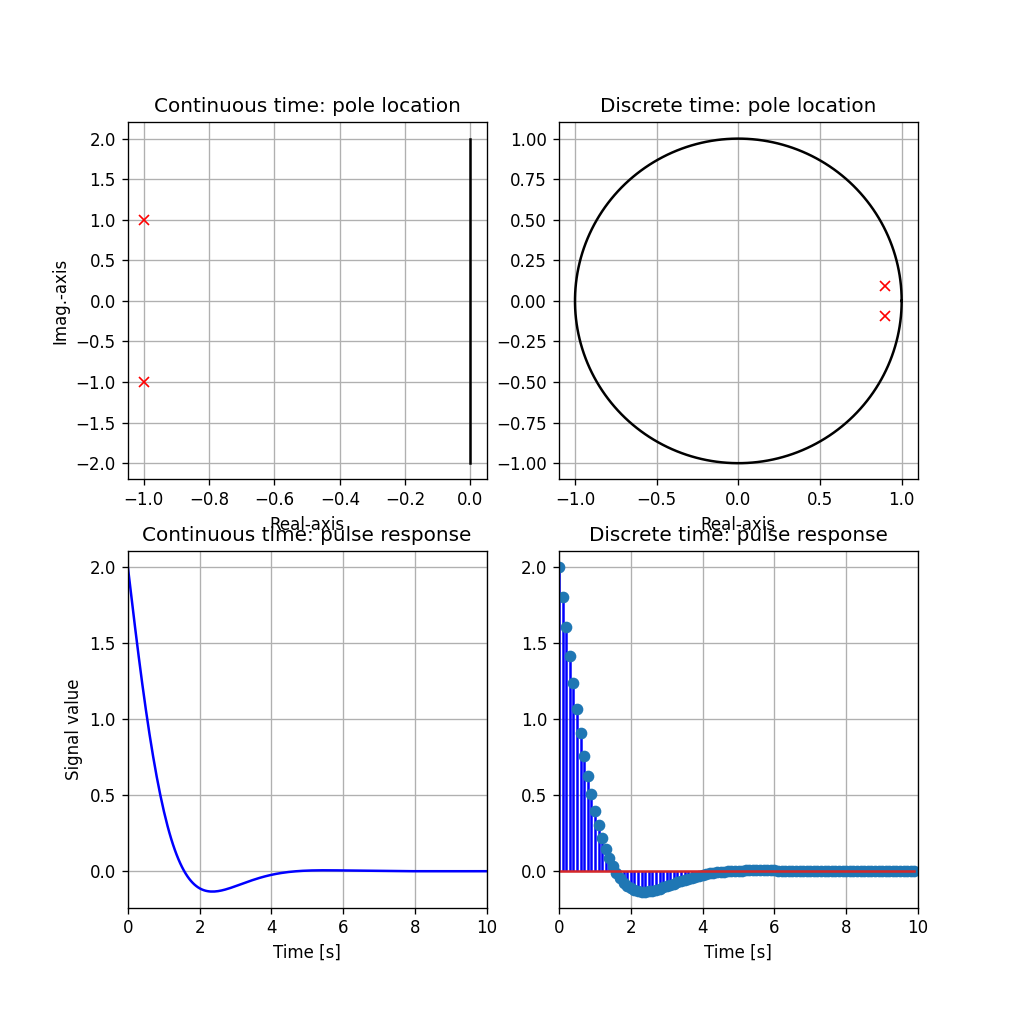

In [1]:
from cmath import exp # need cmath to do math with complex numbers
import numpy as np
from numpy.linalg import eig
import matplotlib
import matplotlib.pyplot as plt

%matplotlib notebook
matplotlib.rcParams['figure.figsize'] = [8.5, 8.5]

# sampling time:
h = 0.1   # what if h small (<<1) and what if h large (h>>1)?

# continuous time poles
#lambda1 = -1.+1*np.pi/h*1j                       # what if real(lambda1) < 0 or = 0 or > 0? why?
                                          # what if imag(lambda1)*h is 0, or pi/2 or pi ?
lambda1 = -1. +1*1j
lambda2 = lambda1.real - lambda1.imag*1j  # choose to be complex conjugate of lambda1

# discrete time poles
lambda_d1 = exp(lambda1*h)
lambda_d2 = exp(lambda2*h)

# response continuous time:
tend = 10.
tc = np.linspace(0,tend,200)
k = np.arange(0,tend/h,1)
# possible form of pulse response:
xc = np.real(np.exp(lambda1*tc)+np.exp(lambda2*tc))
xd = np.real(lambda_d1**k+lambda_d2**k)

plt.subplot(221)
plt.plot([lambda1.real,lambda2.real],[lambda1.imag,lambda2.imag],'rx')
plt.title('Continuous time: pole location')
plt.ylabel('Imag.-axis')
plt.xlabel('Real-axis')
plt.plot([0,0],[-2*max(.5,abs(lambda1.imag)),2*max(.5,abs(lambda1.imag))],'k')
plt.grid()
plt.subplot(222)
plt.plot([lambda_d1.real,lambda_d2.real],[lambda_d1.imag,lambda_d2.imag],'rx')
plt.title('Discrete time: pole location')
#plt.ylabel('Imag.-axis')
plt.xlabel('Real-axis')
circle = np.array([[np.cos(t), np.sin(t)] for t in np.linspace(0,2*np.pi,200)])
plt.plot(circle[:,0],circle[:,1],'k')
plt.grid()

plt.subplot(223)
plt.plot(tc,xc,'b-')
plt.title('Continuous time: pulse response')
plt.ylabel('Signal value')
plt.xlabel('Time [s]')
plt.xlim([-0.01,tend])
plt.grid()

plt.subplot(224)
plt.stem(k*h,xd,'b-')
plt.title('Discrete time: pulse response')
#plt.ylabel('Signal value')
plt.xlabel('Time [s]')
plt.xlim([-0.01,tend])
plt.grid()

In [2]:
import numpy as np 
from numpy.linalg import eig
from numpy.linalg import matrix_rank as rank  # NB numpy.rank geeft aantal dimensies van een array (=len(np.shape(A)))
from numpy.linalg import inv

from mbrtc import is_stable

A = np.array([[0.9,0.1],[0.,0.9]])
B = np.array([[1.],[0.]])
C = np.array([[0.,1.]])
D = np.array([[0.]])

print("Absolute value of eigenvalues: ",abs(eig(A)[0]))

print("State-transition matrix is stable: ",is_stable(A))
print("\n\n")
help(is_stable)

Absolute value of eigenvalues:  [0.9 0.9]
State-transition matrix is stable:  True



Help on function is_stable in module mbrtc:

is_stable(A, domain='discrete')
    Tests if state-transition matrix A is stable for discrete time
    (default, domain="discrete") or continuous time
    (domain="continuous").



In [3]:
import inspect
print(inspect.getsource(is_stable))

def is_stable(A,domain="discrete"):
    """Tests if state-transition matrix A is stable for discrete time
    (default, domain="discrete") or continuous time
    (domain="continuous")."""
    lambda_i = np.linalg.eig(A)[0]
    if (domain == "discrete") or (domain == "d"):
        return np.all(np.abs(lambda_i)<1.)
    elif (domain == "continuous") or (domain == "c"):
        return np.all(lambda_i.real<0.)



In [4]:
from mbrtc import ctrb, is_reachable
Wc = ctrb(A,B)
print("Wc = \n",Wc)
print("Rank of Wc is      : ",rank(Wc))
print("System is reachable: ",is_reachable(A,B))

Wc = 
 [[1.  0.9]
 [0.  0. ]]
Rank of Wc is      :  1
System is reachable:  False


In [5]:
print(inspect.getsource(is_reachable))

def is_reachable(A,B):
    """Tests if state-space matrix pair (A,B) is reachable."""
    n = np.shape(A)[0]
    Wc = ctrb(A,B)
    r = np.linalg.matrix_rank(Wc)
    return r==n



In [6]:
# Voorbeelden (herinner: Phi=A / Gamma=B):
A = np.array([[0.]]); B = np.array([[2]])
Wc = ctrb(A,B)
print(f"Voor A={A} en B={B}:")
print(f"Wc = {Wc}")
print("System is reachable: ",is_reachable(A,B))

Voor A=[[0.]] en B=[[2]]:
Wc = [[2.]]
System is reachable:  True


In [7]:
A = np.array([[1.,0.],[0.,1.]]); B = np.array([[1.],[0.]])
Wc = ctrb(A,B)
print(f"Voor A={A} en B={B}:")
print(f"Wc = {Wc}")
print("System is reachable: ",is_reachable(A,B))

Voor A=[[1. 0.]
 [0. 1.]] en B=[[1.]
 [0.]]:
Wc = [[1. 1.]
 [0. 0.]]
System is reachable:  False


In [8]:
A = np.array([[1.,1.],[0.,1.]]); B = np.array([[1.],[0.]])
Wc = ctrb(A,B)
print(f"Voor A={A} en B={B}:")
print(f"Wc = {Wc}")
print("System is reachable: ",is_reachable(A,B))

Voor A=[[1. 1.]
 [0. 1.]] en B=[[1.]
 [0.]]:
Wc = [[1. 1.]
 [0. 0.]]
System is reachable:  False


In [9]:
A = np.array([[1.,1.],[0.,1.]]); B = np.array([[0.],[1.]])
Wc = ctrb(A,B)
print(f"Voor A={A} en B={B}:")
print(f"Wc = {Wc}")
print("System is reachable: ",is_reachable(A,B))

Voor A=[[1. 1.]
 [0. 1.]] en B=[[0.]
 [1.]]:
Wc = [[0. 1.]
 [1. 1.]]
System is reachable:  True


In [10]:
from mbrtc import ss2tf, canon_ctrl, similarity_trans
A = np.array([[0.9,0.1],[0.,0.9]])
B = np.array([[0.],[1.]])
C = np.array([[0.,1.]])
D = np.array([[0.]])
[num,den] = ss2tf(A,B,C,D)
print("Discrete time transfer function:")
print(f"coefficients numerator = {num}, coefficients denominator = {den}")
# transformation to controller canonical form:
T = canon_ctrl(A,B)
Actrl,Bctrl,Cctrl = similarity_trans(A,B,C,T)
print("Controller canonical form:")
print(f"A = {np.round(Actrl,2)}")
print(f"B = {np.round(Bctrl,2)}")
print(f"C = {np.round(Cctrl,2)}")

Discrete time transfer function:
coefficients numerator = [[ 0.   1.  -0.9]], coefficients denominator = [ 1.   -1.8   0.81]
Controller canonical form:
A = [[ 1.8  -0.81]
 [ 1.   -0.  ]]
B = [[ 1.]
 [-0.]]
C = [[ 1.  -0.9]]


In [11]:
from mbrtc import obsv, is_observable
A = np.array([[0.9,0.1],[0.,0.9]])
B = np.array([[1.],[0.]])
C = np.array([[0.,1.]])
D = np.array([[0.]])

Wo = obsv(A,C)
print("Wo = \n",Wo)
print("Rank of Wo is       : ",rank(Wo))
print("System is observable: ",is_observable(A,C))

Wo = 
 [[0.  1. ]
 [0.  0.9]]
Rank of Wo is       :  1
System is observable:  False


In [12]:
A = np.array([[0.9,0.1],[0.,0.9]])
C = np.array([[1.,0.]])

Wo = obsv(A,C)
print("Wo = \n",Wo)
print("Rank of Wo is       : ",rank(Wo))
print("System is observable: ",is_observable(A,C))

Wo = 
 [[1.  0. ]
 [0.9 0.1]]
Rank of Wo is       :  2
System is observable:  True


In [13]:
from mbrtc import ss2tf, canon_obsv, similarity_trans
A = np.array([[0.9,0.1],[0.,0.9]])
B = np.array([[0.],[1.]])
C = np.array([[1.,0.]])
D = np.array([[0.]])
[num,den] = ss2tf(A,B,C,D)
print("Discrete time transfer function:")
print(f"coefficients numerator = {num}, coefficients denominator = {den}")
# transformation to observer canonical form:
T = canon_obsv(A,C)
Actrl,Bctrl,Cctrl = similarity_trans(A,B,C,T)
print("Observer canonical form:")
print(f"A = {np.round(Actrl,2)}")
print(f"B = {np.round(Bctrl,2)}")
print(f"C = {np.round(Cctrl,2)}")

Discrete time transfer function:
coefficients numerator = [[0.  0.  0.1]], coefficients denominator = [ 1.   -1.8   0.81]
Observer canonical form:
A = [[ 1.8   1.  ]
 [-0.81  0.  ]]
B = [[0. ]
 [0.1]]
C = [[ 1. -0.]]


In [14]:
import mbrtc
dir(mbrtc)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'c2d_characteristic_equation',
 'c2d_pole',
 'c2d_zoh',
 'c2d_zoh_AB',
 'c2d_zoh_intersample',
 'canon',
 'canon_ctrl',
 'canon_obsv',
 'ctrb',
 'd2c_characteristic_equation',
 'd2c_pole',
 'd2c_zoh',
 'd2c_zoh_AB',
 'dc_gain',
 'expm',
 'impulse_signal',
 'is_observable',
 'is_reachable',
 'is_stable',
 'logm',
 'lsim2',
 'np',
 'obsv',
 'place',
 'pretty_polynomial',
 'random_impulses',
 'sim',
 'sim_continuous',
 'sim_intersample',
 'sim_state',
 'similarity_trans',
 'spike',
 'ss2tf',
 'ss_feedback',
 'ss_parallel',
 'ss_series',
 'step_signal',
 'tf2ss']

In [15]:
from inspect import getmembers, isfunction

functions_list = [fun for fun in getmembers(mbrtc) if isfunction(fun[1])]
# print all helps:
for fun in functions_list:
    help(fun[1])

Help on function c2d_characteristic_equation in module mbrtc:

c2d_characteristic_equation(ac, h)
    Convert characteristic polynomial from continuous to discrete
    time

Help on function c2d_pole in module mbrtc:

c2d_pole(lambda_i, h)
    Convert poles from continuous to discrete time

Help on function c2d_zoh in module mbrtc:

c2d_zoh(Ac, Bc, Cc, Dc, h)

Help on function c2d_zoh_AB in module mbrtc:

c2d_zoh_AB(Ac, Bc, h)

Help on function c2d_zoh_intersample in module mbrtc:

c2d_zoh_intersample(Ac, Bc, Cc, Dc, h, number_intersamples)
    Convert continuous time state-space model to discrete-time and
    intersample discrete time, for use in sim_intersample.

Help on function canon in module mbrtc:

canon(A, B, C, method='ctrl')

Help on function canon_ctrl in module mbrtc:

canon_ctrl(A, B)
    Find similarity transformation to transform to controller canonical form.

Help on function canon_obsv in module mbrtc:

canon_obsv(A, C)
    Find similarity transformation to transform t